In [1]:
from tifffile import imread
import os
from matplotlib import pyplot as plt
import json
from scipy.io import loadmat
import h5py
import numpy as np

In [2]:
pth_WSI_segmentations = r'\\10.99.68.178\andre\Eduarda PDAC\immune_cell_pipeline\star_dist_Donald_model\StarDist_1_29_23\json'
npdi_im_path = r'\\10.99.68.178\andre\Eduarda PDAC\immune_cell_pipeline\star_dist_Donald_model'

In [3]:
json_pth_list = sorted([os.path.join(pth_WSI_segmentations,file) for file in os.listdir(pth_WSI_segmentations) if file.endswith(".json")])
print(json_pth_list)

['\\\\10.99.68.178\\andre\\Eduarda PDAC\\immune_cell_pipeline\\star_dist_Donald_model\\StarDist_1_29_23\\json\\OM1R_618.json']


In [4]:
im_list = sorted(os.listdir(npdi_im_path))
im_list = [im for im in im_list if im.endswith('.ndpi')]
print(im_list)

['OM1R_618.ndpi', 'OM2R_786.ndpi', 'YM1R_210.ndpi', 'YM2R_326.ndpi']


In [5]:
# read one image
ind = 0

HE_20x_WSI = imread(os.path.join(npdi_im_path, im_list[ind]))

In [6]:
crop_x = 24218
crop_y = 28381
tile_size = 512*4

HE_20x_tile = HE_20x_WSI[crop_y:crop_y+tile_size, crop_x:crop_x+tile_size]

In [7]:
def show_tile(tile, **kwargs):
    """Plot a single image."""
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    ax.imshow(tile, **kwargs)
    plt.tight_layout()
    ax.set_axis_off()
    plt.show()

In [8]:
def adjust_contours(contours_matched, x, y):

    contours_matched_adjusted = []
    for i in range(len(contours_matched)):
        contour = contours_matched[i][0]
        x_coords = contour[0]
        y_coords = contour[1]
        x_coords = [point-x for point in x_coords]
        y_coords = [point-y for point in y_coords]
        
        shape = list(zip(x_coords, y_coords))
        contours_matched_adjusted.append(shape)
    
    return contours_matched_adjusted

In [9]:
def adjust_coords_and_plot(centroids, contours, crop_x, crop_y, cropped_HE_im):
    centroids_total_np = np.array(centroids)
    adj_centroids = [[pair[0] - crop_y, pair[1] - crop_x] for pair in centroids]
    centroids_in_tile = [pair for pair in adj_centroids if 0 < pair[0] < tile_size and 0 < pair[1] < tile_size]
    
    indices_matched = [adj_centroids.index(pair) for pair in adj_centroids if pair in centroids_in_tile]
    
    contours_in_tile = [contours[i] for i in indices_matched]

    contours_in_tile_adjusted = adjust_contours(contours_in_tile, crop_y, crop_x)
    
    reversed_contours = [[(y, x) for x, y in polygon] for polygon in contours_in_tile_adjusted]

    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Plot the image
    ax.imshow(cropped_HE_im)
    ax.set_axis_off()
    
    for polygon in reversed_contours:
        x_coords, y_coords = zip(*polygon)
        x_coords = list(x_coords) + [x_coords[0]]  # Close the polygon
        y_coords = list(y_coords) + [y_coords[0]]  # Close the polygon
    
        color = 'red'
        
        skip = False
        for x in x_coords:
            if x < 0 or x > (tile_size - 1):
                skip = True
                break
        for y in y_coords:
            if y < 0 or y > (tile_size - 1):
                skip = True
                break
        
        if not skip:
    
            ax.plot(x_coords, y_coords, alpha=0.4, color=color)
            ax.fill(x_coords, y_coords, alpha=0.4, color=color)  # Fill the polygon
    
    # Set labels and title for the plot
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('StarDist Segmentation')
    
    plt.show()

In [10]:
def adjust_contours(contours_matched, x, y):

    contours_matched_adjusted = []
    for i in range(len(contours_matched)):
        contour = contours_matched[i][0]
        x_coords = contour[0]
        y_coords = contour[1]
        x_coords = [point-x for point in x_coords]
        y_coords = [point-y for point in y_coords]
        
        shape = list(zip(x_coords, y_coords))
        contours_matched_adjusted.append(shape)
    
    return contours_matched_adjusted

In [11]:
segmentation_data = json.load(open(json_pth_list[ind]))

centroids = [nuc['centroid'][0] for nuc in segmentation_data]
contours = [nuc['contour'] for nuc in segmentation_data]
print(len(centroids))
print(len(contours))

414267
414267


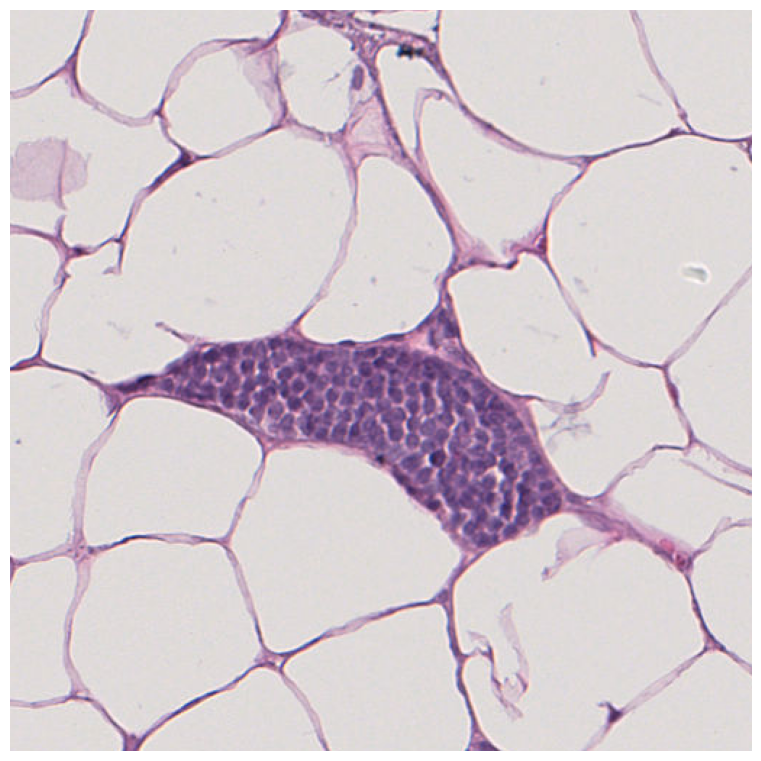

In [44]:
# neutrophils on first image in the folder idk which one
#crop_x = 7414
#crop_y = 17113
#tile_size = 500

crop_x = 3484-50
crop_y = 27114-200
tile_size = 512

HE_20x_tile = HE_20x_WSI[crop_y:crop_y+tile_size, crop_x:crop_x+tile_size]

def show_tile(tile, **kwargs):
    """Plot a single image."""
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    ax.imshow(tile, **kwargs)
    plt.tight_layout()
    ax.set_axis_off()
    plt.show()
    
show_tile(HE_20x_tile)

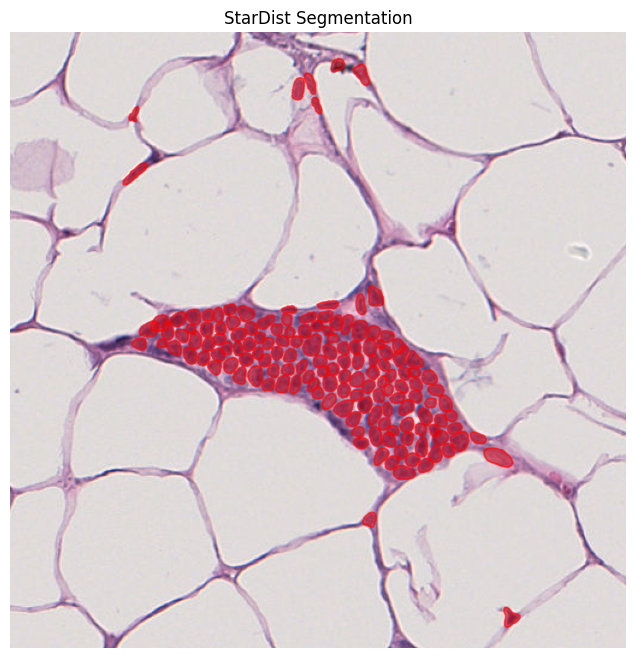

In [45]:
adjust_coords_and_plot(centroids, contours, crop_x, crop_y, HE_20x_tile)